In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

data_path = './data/australian.dat'
df = np.genfromtxt(data_path)
df = pd.DataFrame(data = df)
df.columns = ['X' + str(i) for i in range(1, 15)] + ['Y']
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
0,1.0,22.08,11.46,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0,0.0
1,0.0,22.67,7.00,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0,0.0
2,0.0,29.58,1.75,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0,0.0
3,0.0,21.67,11.50,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0,1.0
4,1.0,20.17,8.17,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0,1.0


In [9]:
X = df.drop(columns = 'Y')
y = df['Y']

encode_rules = ColumnTransformer(
    transformers = [('one_hot_encoder', OneHotEncoder(categories = 'auto'), [3, 4, 5, 11])],
    remainder = 'passthrough'
)

X = encode_rules.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)
print(X_train.shape, X_test.shape)

(552, 38) (138, 38)


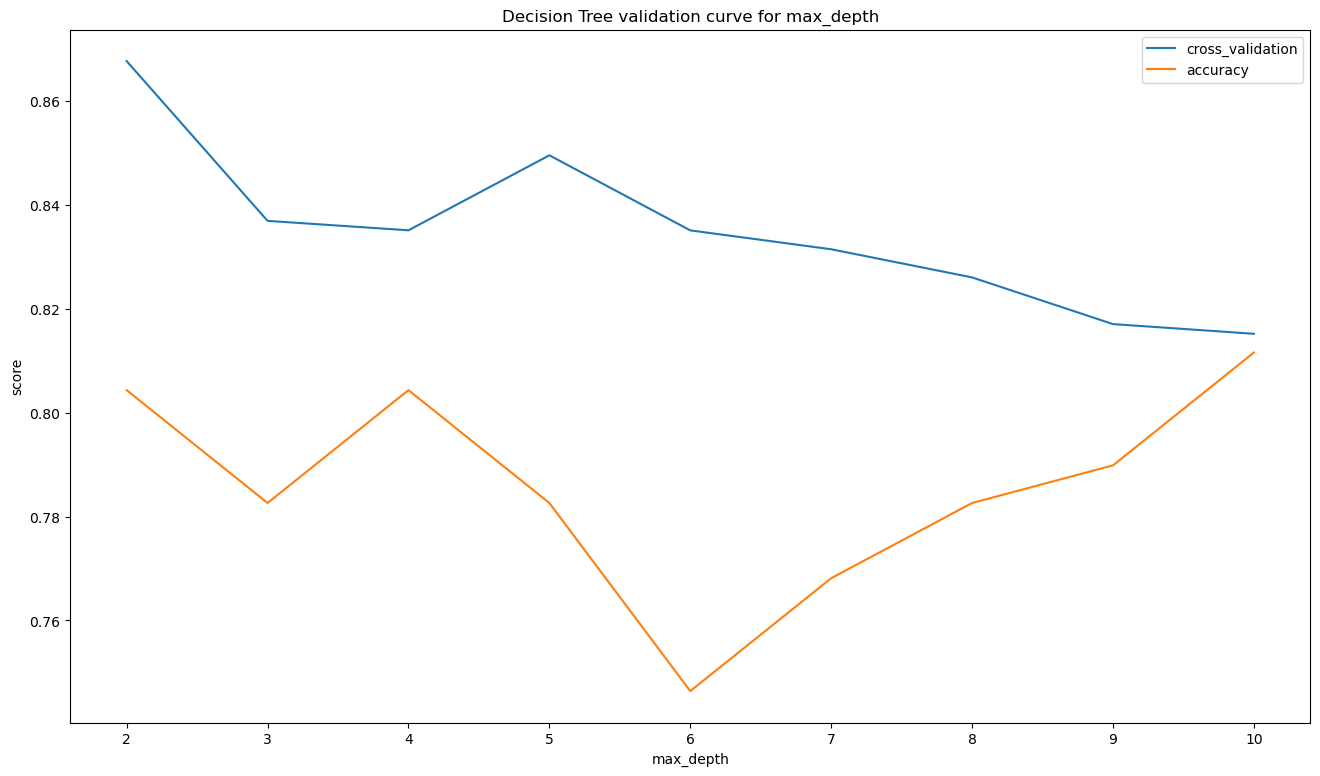

In [21]:
max_depth = np.arange(2, 11)
cross_validation = []
accuracies = []

for k in max_depth:
    
    d_tree = DecisionTreeClassifier(random_state = 12, max_depth = k)
    scores = cross_val_score(estimator = d_tree, X = X_train, y = y_train, cv = 5, scoring = 'accuracy')
    scores = scores.mean()
    cross_validation.append(scores)

    d_tree.fit(X_train, y_train)
    y_pred = d_tree.predict(X_test)
    scores = accuracy_score(y_pred, y_test)
    accuracies.append(scores)

plt.figure(figsize = (16, 9))
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Decision Tree validation curve for max_depth')
plt.plot(max_depth, cross_validation, label = 'cross_validation')
plt.plot(max_depth, accuracies, label = 'accuracy')
plt.legend()
plt.show()

In [22]:
param = {
    'max_depth': np.arange(2, 10),
    'min_samples_split' : np.arange(2, 302, 20),
    'min_samples_leaf' : np.arange(1, 301, 20),
    'max_leaf_nodes': (2, 3, 4, 5, 10, 15, 20, 35, 50, 75, 100),
    'class_weight': ['balanced', None, {0: 1, 1: 5}]
}
grid = GridSearchCV(DecisionTreeClassifier(), param, verbose = 1, n_jobs = -1)
grid_fit = grid.fit(X_train, y_train)
print(grid_fit.best_params_)

Fitting 5 folds for each of 59400 candidates, totalling 297000 fits
{'class_weight': 'balanced', 'max_depth': np.int64(5), 'max_leaf_nodes': 10, 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2)}


In [26]:
y_pred = grid_fit.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7971014492753623


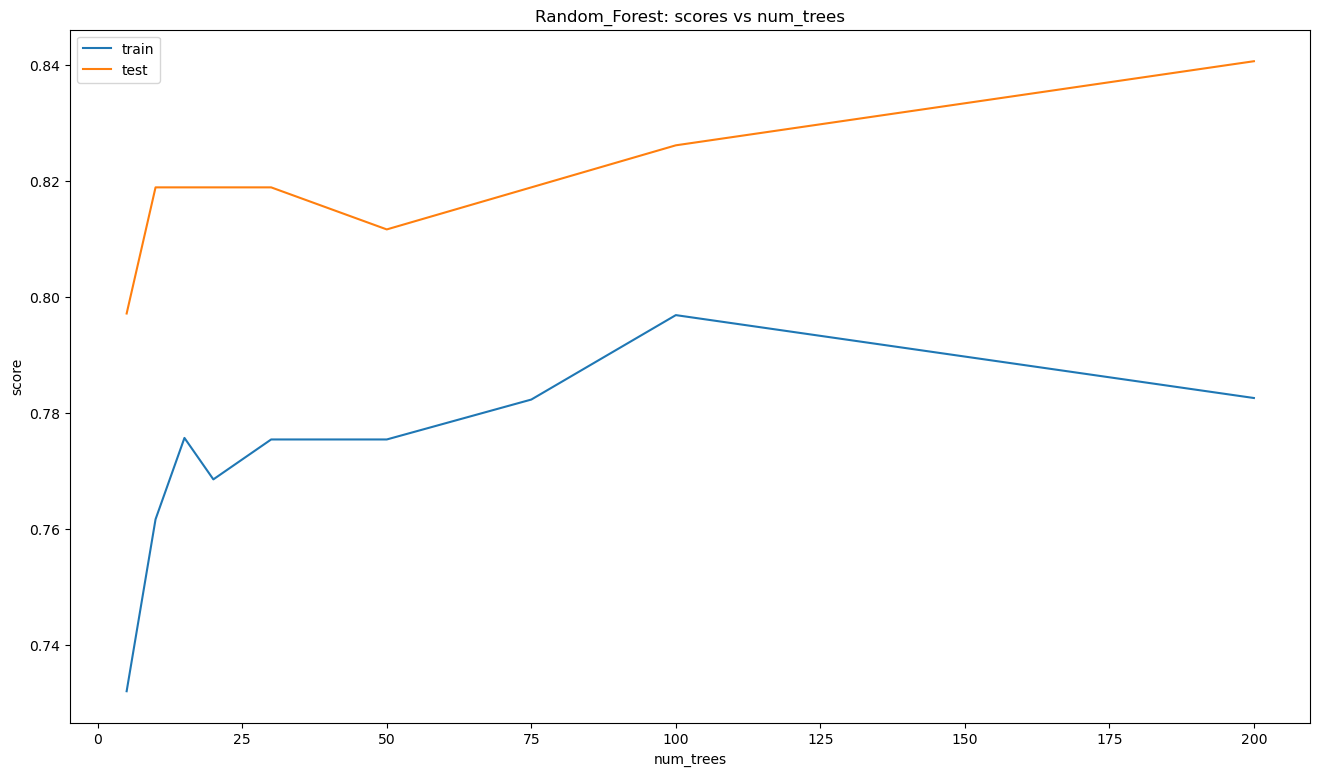

In [29]:
num_trees = [5, 10, 15, 20, 30, 50, 75, 100, 200]
train_accuracy = []
test_accuracy = []

for n in num_trees:
    
    r_tree = RandomForestClassifier(n_estimators = n, random_state = 12, n_jobs = -1)
    r_tree.fit(X_train, y_train)
    y_pred = r_tree.predict(X_test)
    
    accuracy = accuracy_score(y_pred, y_test)
    test_accuracy.append(accuracy)

    cross_score = cross_val_score(r_tree, X_test, y_test, cv = 5, scoring = 'accuracy')
    cross_score = cross_score.mean()
    train_accuracy.append(cross_score)

plt.figure(figsize = (16, 9))
plt.xlabel('num_trees')
plt.ylabel('score')
plt.title('Random_Forest: scores vs num_trees')
plt.plot(num_trees, train_accuracy, label = 'train')
plt.plot(num_trees, test_accuracy, label = 'test')
plt.legend()
plt.show()

In [33]:
parameter = {
    'max_depth': [2, 3, 5, 7, 10, 20],
    'min_samples_leaf': [1, 10, 30, 60],
    'max_features': [1.0,'log2','sqrt','auto'],
    'n_estimators': [1,2, 3, 5, 10, 20, 50, 100, 170]
}
grid = GridSearchCV(RandomForestClassifier(random_state = 12), parameter, n_jobs = -1, verbose = 1)
grid_fit = grid.fit(X_train, y_train)
print(grid_fit.best_params_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}


C:\Users\Dell 5520\miniconda3\envs\Dang\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1080 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
447 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell 5520\miniconda3\envs\Dang\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell 5520\miniconda3\envs\Dang\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Dell 5520\miniconda3\envs\Dang\Lib\s

In [32]:
y_pred = grid_fit.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8333333333333334
